In [4]:
import pandas as pd

In [5]:
jan_df = pd.read_parquet('/content/fhv_tripdata_2021-01.parquet')

In [6]:
feb_df = pd.read_parquet('/content/fhv_tripdata_2021-02.parquet')

In [7]:
## Question 1

In [8]:
record_count = jan_df.shape[0]
feature_count = feb_df.shape[0]

print(record_count)

1154112


In [9]:
## Question 2

In [10]:
jan_df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

In [11]:
jan_df.loc[:,'duration'] = (jan_df['dropOff_datetime'] - jan_df['pickup_datetime']).dt.total_seconds() / 60.0

In [12]:
jan_df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
duration                         float64
dtype: object

In [13]:
jan_df["duration"].mean()

19.1672240937939

In [14]:
jan_df["duration"].describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

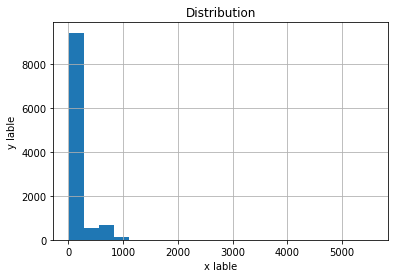

In [15]:
import matplotlib.pyplot as plt
jan_df['duration'].value_counts().hist(bins = 20)
plt.title('Distribution')
plt.xlabel('x lable')
plt.ylabel('y lable')
plt.show()

In [16]:
print("Before dropping records: ",record_count)

jan_df_filtered = jan_df[(jan_df["duration"] >= 1) & (jan_df["duration"] <= 60)]

print("After dropping records: ", jan_df_filtered.shape[0])

print("Records dropped: ", record_count - jan_df_filtered.shape[0])

Before dropping records:  1154112
After dropping records:  1109826
Records dropped:  44286


In [17]:
## Question 3

In [18]:
missing_pickup_id = jan_df_filtered["PUlocationID"].isna().sum()
missing_destination_id = jan_df_filtered["DOlocationID"].isna().sum()

print("Missing record number in pickup location id is ", missing_pickup_id, " and destination location id is ", missing_destination_id)

Missing record number in pickup location id is  927008  and destination location id is  147907


In [33]:
jan_df_filtered["PUlocationID"].fillna(-1, inplace=True)
jan_df_filtered["DOlocationID"].fillna(-1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [35]:
shape1 = jan_df_filtered[jan_df_filtered["PUlocationID"] == -1].shape[0]
shape2 = jan_df_filtered.shape[0]
print("Percentage of -1 record in the dataframe: ", shape1/shape2)

Percentage of -1 record in the dataframe:  0.8352732770722617


In [22]:
##Question4

In [103]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    
    categorical = ['PUlocationID', 'DOlocationID']
    
    df[categorical] = df[categorical].fillna(-1)
    df[categorical] = df[categorical].astype(str)
    
    return df

df_train = read_dataframe('/content/fhv_tripdata_2021-01.parquet')
df_val = read_dataframe('/content/fhv_tripdata_2021-02.parquet')

categorical = ['PUlocationID', 'DOlocationID']
jan_dict = df_train[categorical].to_dict(orient = "records")

feb_dict = df_val[categorical].to_dict(orient = "records")

In [104]:
len(jan_dict)

1109826

In [105]:
len(feb_dict)

990113

In [106]:
from sklearn.feature_extraction import DictVectorizer

In [107]:
dv = DictVectorizer()
X_train = dv.fit_transform(jan_dict)

In [117]:
X_train.shape

(1109826, 525)

In [115]:
X_val = dv.fit_transform(feb_dict)

In [116]:
X_val.shape

(990113, 526)

In [80]:
##Question5

In [111]:
# defining the target
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [112]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [113]:

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(mean_squared_error(y_train, y_pred, squared=False))

10.528519107210744


In [114]:
#Q6 Evaluating the model on validation set
y_pred = lr.predict(X_val)

print(mean_squared_error(y_val, y_pred, squared=False))

ValueError: ignored